In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy as sci
from scipy.integrate import solve_ivp
from random import *
from itertools import permutations
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from matplotlib import animation
from matplotlib.animation import PillowWriter
from IPython.display import HTML
from collections import deque
import matplotlib

In [2]:
# posição inicial em metros

r10 = [-0.5,0,0] 
r20 = [0.5,0,0] 
r30 = [0,1,0] 

# transformando as listas do python em vetores do numpy

r10 = np.array(r10, dtype='float64')
r20 = np.array(r20, dtype='float64')
r30 = np.array(r30, dtype='float64')

# valores mínimo e máximo para a velocidade

mi = -0.01
ma = 0.01

escolha = 0

while (escolha != 1 and escolha != 2 and escolha != 3 and escolha != 4):

    print(f"Escolha uma velocidade inicial pré determinada (1, 2, 3 ou 4 (velocidade aleatória)): ")
    escolha = int(input())
    
if escolha == 1:
    
    v10 = [0, -0.01, 0]
    v20 = [0, 0.01, 0] 
    v30 = [0.01, 0.01, -0.01]
    
if escolha == 2:
    
    v10 = [0.01, 0.01, 0] 
    v20 = [-0.05, 0, -0.1] 
    v30 = [0, -0.01, 0]

v10 = np.array(v10, dtype='float64')
v20 = np.array(v20, dtype='float64')
v30 = np.array(v30, dtype='float64')

# massa dos corpos com massa solar de referência

m1 = 1.1 # alpha Centauri A
m2 = 0.907 # alpha Centauri B
m3 = 1 # sol

##mi = [m1, m2, m3]

Escolha uma velocidade inicial pré determinada (1, 2, 3 ou 4 (velocidade aleatória)): 
1


In [3]:
# valor da constante da gravitação universal
G = 6.67430e-11 #N-m2/kg2

# Valores de referência 
m_ref = 1.989e30 # massa do sol
r_ref = 3.4707e12 # distância média entre as estrelas alpha centauri A e alpha centauri B
v_ref = 29780 # velocidade orbital média da terra em torno do sol 
t_ref = 79.91*365*24*3600*0.51 # período orbital da estrela alpha centauri A em torno do centro de massa

# fazendo a não dimensonalização dos valores para uma melhor convergência numérica

K1 = G*t_ref*m_ref/(r_ref**2*v_ref)
K2 = v_ref * t_ref/r_ref

params_iniciais = np.concatenate([r10, r20, r30, v10, v20, v30])
params_iniciais = np.array(params_iniciais, dtype='float64')

In [4]:
def tbp (dadosc, tc):
    
    m1c = 1.1
    m2c = 0.907
    m3c = 1
    r1c, r2c, r3c = dadosc[:3], dadosc[3:6], dadosc[6:9]
    v1c, v2c, v3c = dadosc[9:12], dadosc[12:15], dadosc[15:18]

    # distância entre os corpos
    r12c = np.linalg.norm(r1c-r2c)
    r13c = np.linalg.norm(r1c-r3c)
    r23c = np.linalg.norm(r2c-r3c)

    #lei da gravitação universal de newton para achar a segunda derivada da posição que é a aceleração
    a1c = ( K1*  m2c * ( ( r2c-r1c )/ r12c**3 ) ) + ( K1 * m3c * ( ( r3c-r1c )/ r13c**3 ) )
    a2c = ( K1*  m3c * ( ( r3c-r2c )/ r23c**3 ) ) + ( K1 * m1c * ( ( r1c-r2c )/ r12c**3 ) )
    a3c = ( K1*  m1c * ( ( r1c-r3c )/ r13c**3 ) ) + ( K1 * m2c * ( ( r2c-r3c )/ r23c**3 ) )

    # velocidade dos corpos com base no K2 calculado anteriormente
    v1c = K2*v1c
    v2c = K2*v2c
    v3c = K2*v3c
    
    #função tem que retornar array de 1 dimensão pra odeint funcionar
    resultado = np.concatenate((v1c, v2c, v3c, a1c, a2c, a3c))
    
    return resultado

In [5]:
#resolvendo a equação diferencial de segunda ordem usando uma função disponível na biblioteca sympy

# linspace que representa o tempo
tl = np.linspace(0,5,500)
solvd = sci.integrate.odeint(tbp, params_iniciais, tl)

In [6]:
# separar todos as posições de solvd em posições de r1, r2, r3
# a função do sympy retorna um vetor de uma dimensão, sendo necessário separar as informações

r1_sol = solvd[:, :3]
x1, y1, z1 = r1_sol[:,0],r1_sol[:,1],r1_sol[:,2]

r2_sol = solvd[:,3:6]
x2, y2, z2 = r2_sol[:,0],r2_sol[:,1],r2_sol[:,2]

r3_sol = solvd[:,6:9]
x3, y3, z3 = r3_sol[:,0],r3_sol[:,1],r3_sol[:,2]

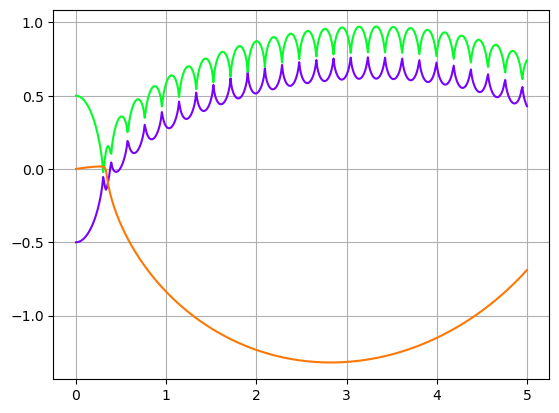

In [7]:
# plot individual de cada partícula no x 

fig, ax = plt.subplots()
ax.plot(tl,x1, color = "#7703fc")
ax.plot(tl, x2, color = "#03fc28")
ax.plot(tl, x3, color = "#fc7703")
plt.grid()
plt.show()

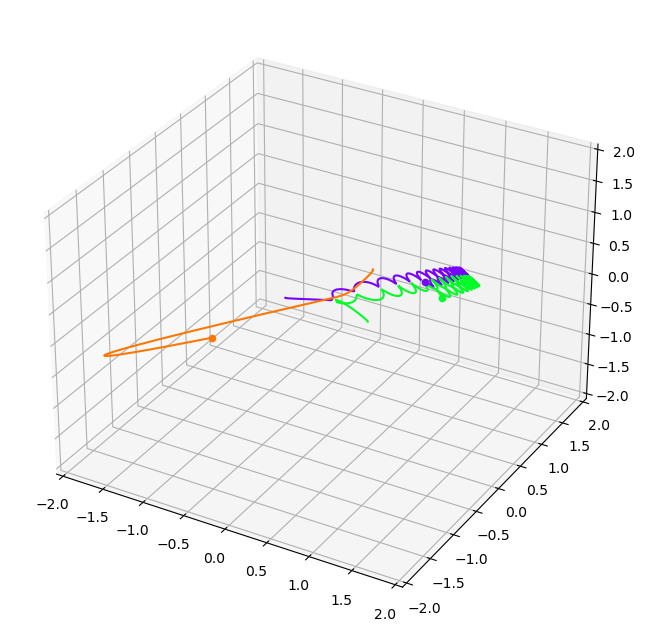

In [8]:
# plotar

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection="3d")

ax.set_xlim(-2, 2)
ax.set_ylim(-2, 2)
ax.set_zlim(-2, 2)

ax.plot(x1, y1, z1, c = '#7703fc', label='corpo 1')
ax.plot(x2, y2, z2, c = '#03fc28', label='corpo 2')
ax.plot(x3, y3, z3, c = '#fc7703', label='corpo 3')
ax.scatter(x1[-1], y1[-1], z1[-1], color="#7703fc")
ax.scatter(x2[-1], y2[-1], z2[-1], color="#03fc28")
ax.scatter(x3[-1], y3[-1], z3[-1], color="#fc7703")


plt.grid()
plt.show()

RuntimeError: x must be a sequence

Error in callback <function _draw_all_if_interactive at 0x7f71389bd5a0> (for post_execute):


RuntimeError: x must be a sequence

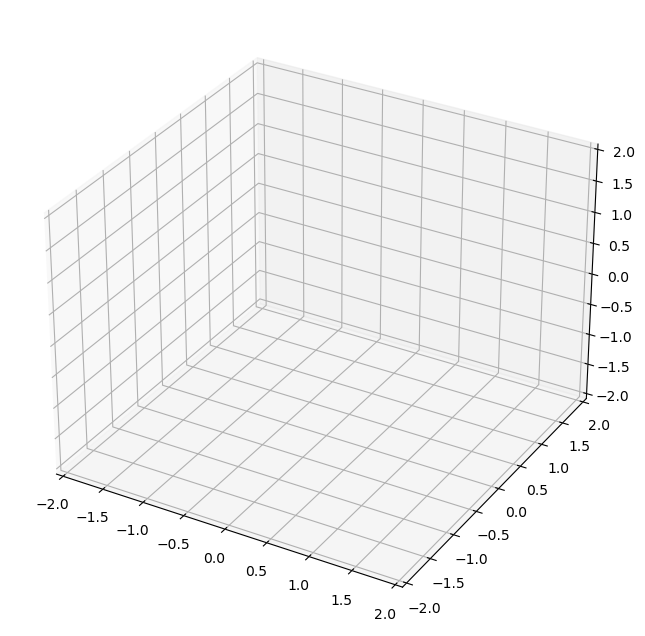

In [9]:
# criação do animação da interação entre os 3 corpos

'''A animação 3d tá instável para as novas versões do python, se não rodar, cada gif que deve ser gerado estará
disponível na mesma pasta que esse arquivo'''

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')

### armazena o ''historico'' de cada corpo

his1x = deque(maxlen = len(x1))
his1y = deque(maxlen = len(y1))
his1z = deque(maxlen = len(z1))
his2x = deque(maxlen =len(x2))
his2y = deque(maxlen = len(y2)) 
his2z = deque(maxlen = len(z2))                   
his3x = deque(maxlen = len(x3))
his3y = deque(maxlen = len(y3))
his3z = deque(maxlen = len(z3))

def animate(i,corpo1,corpo2,corpo3):
    
    '''cria as variaveis que serao animadas e itera sobre elas
    (o numero de iteraçoes é o tamanho da lista)'''

    '''o set_data_3d separa '''
    
    corpo1.set_data_3d(x1[i],y1[i],z1[i])
    corpo2.set_data_3d(x2[i],y2[i],z2[i])
    corpo3.set_data_3d(x3[i],y3[i],z3[i])


    his1x.appendleft(x1[i])
    his1y.appendleft(y1[i])
    his1z.appendleft(z1[i])
    his2x.appendleft(x2[i])
    his2y.appendleft(y2[i])
    his2z.appendleft(z2[i])
    his3x.appendleft(x3[i])
    his3y.appendleft(y3[i])
    his3z.appendleft(z3[i])
    
                     
    trace1.set_data_3d(his1x,his1y,his1z)
    trace2.set_data_3d(his2x,his2y,his2z)
    trace3.set_data_3d(his3x,his3y,his3z)
    
    return corpo1, corpo2, corpo3, trace1, trace2, trace3
                     
    
corpo1, = ax.plot([],[],[],'o',markersize=3.6, color ='#7703fc')
corpo2, = ax.plot([],[],[],'o',markersize=3.6, color ='#03fc28')
corpo3, = ax.plot([],[],[],'o',markersize=3.6, color ='#fc7703')
trace1, = ax.plot([],[],[], 'o-',markersize=0.2, color ='#7703fc')
trace2, = ax.plot([],[],[], 'o-',markersize=0.2, color ='#03fc28')
trace3, = ax.plot([],[],[], 'o-',markersize=0.2, color ='#fc7703')
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)
anima=animation.FuncAnimation(fig,animate,frames=len(x1),blit=False,interval=20,fargs=(corpo1,corpo2,corpo3))
matplotlib.rcParams['animation.embed_limit'] = 2**128

''' comentar o HTML(anima.to_jshtml()) se quiser salvar a gif no computador'''
''' comentar o anima.save('trabalhoicf.gif', writer='pillow', fps=30) se quiser mostrar a animação no código
em tempo real'''

HTML(anima.to_jshtml())
#anima.save('trabalhoicf.gif', writer='pillow', fps=30)